In [1]:
NIU= '1676127', '1665817', '1666540', '1674234'
GRUP='09'

Assignatura: Processament de Senyal, Imatge i Vídeo 2023-24

Grau: Enginyeria de Dades

Contingut: SEGMENTACIÓ D'IMATGES BINARIES

Descripció de l'activitat: Aquest notebook proporciona un exemple pas a pas per fer la segmentació d'imatges binàries utilitzant l'anàlisi de components connectats.

Primer pas es carrregar les llibreries

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Tarea 1: Cargar y Binarizar la Imagen

**Instrucciones:**
- Carga la imagen "imatge.png" utilizando OpenCV.
- Convierte esta imagen a escala de grises.
- Aplica un umbral para binarizar la imagen. (en este caso negro = 0, blanco = 255 para que poder visualizarlo bien). El threshold lo teneis que pensar vosotros, depende de la imagen en escala de grises resultante (se recomienda visualizarla).
- Muestra la imagen resultante.

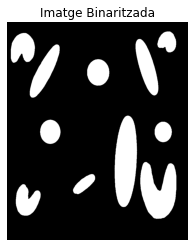

In [28]:
# Carregar la imatge
imatge = cv2.imread("imatge.png")

# Convertir la imatge a escala de grisos
imatge_gris = cv2.cvtColor(imatge, cv2.COLOR_BGR2GRAY)

# Aplicar un llindar per binaritzar la imatge
llindar, binary_image = cv2.threshold(imatge_gris, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Mostrar la imatge binaritzada
plt.imshow(binary_image, cmap='gray')
plt.title('Imatge Binaritzada')
plt.axis('off')  # Desactivar los ejes
plt.show()

## Tarea 2: Análisis de Componentes
**Instrucciones:**

- Utiliza la imagen binarizada de la Tarea 1.
- Completar el algoritmo de region growing que devuelva el número de componentes.


In [29]:
def region_growing_algorithm(binary_image):
    # Obtener las dimensiones de la imagen
    height, width = binary_image.shape
    
    # Inicializar un conjunto para almacenar las etiquetas de los componentes conectados
    connected_components = set()
    etiquetados = set() # contendra una tupla con los índices de los píxeles
    # Definir una lista de vecinos (8-conectividad)
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]
    
    # Iterar sobre cada píxel de la imagen
    for y in range(height):
        for x in range(width):
            # Si el píxel actual es parte de un componente (valor 1 (255))
            if binary_image[y, x] == 255 and (y, x) not in etiquetados:
                # Inicializar la etiqueta del componente actual
                current_label = len(connected_components) + 1
                
                # Inicializar una lista para almacenar los píxeles del componente actual
                component_pixels = [(y, x)]
                
                # Iterar sobre los píxeles del componente actual
                while component_pixels:
                    cy, cx = component_pixels.pop()
                    # Asignar la etiqueta al píxel actual
                    binary_image[cy, cx] = current_label
                    # Agregar el píxel actual a los píxeles etiquetados
                    etiquetados.add((cy, cx))
                    
                    # Comprobar los vecinos del píxel actual y ir añadiendo los píxeles al componente
                    for dy, dx in neighbors:
                        # Obtener las coordenadas del vecino actual
                        ny, nx = cy + dy, cx + dx

                        # Comprobar si el vecino está dentro de los límites de la imagen
                        if 0 <= ny < height and 0 <= nx < width:
                            # Comprobar si el vecino es parte del componente (tiene el mismo valor que el píxel actual)
                            if binary_image[ny, nx] == 255 and binary_image[ny, nx] == 255 and (ny, nx) not in etiquetados:
                                # Agregar el vecino a los píxeles del componente actual
                                component_pixels.append((ny, nx))
                
                # Agregar la etiqueta del componente actual al conjunto de componentes conectados
                connected_components.add(current_label)
    
    # Devolver el número de componentes conectados
    return len(connected_components)


In [30]:
num_components = region_growing_algorithm(binary_image)
print("Número de componentes conectados:", num_components)

Número de componentes conectados: 11
